In [3]:
import pandas as pd

yield_df = pd.read_csv("daily10yryield06-25.csv")
dxy_df = pd.read_csv("nominalbroadDXY06-25.csv")

In [4]:
yield_df = yield_df.rename(columns={"observation_date": "Date", "DGS10": "Yield_10Y"})
dxy_df = dxy_df.rename(columns={"observation_date": "Date", "DTWEXBGS": "Dollar_Index"})

yield_df["Date"] = pd.to_datetime(yield_df["Date"])
dxy_df["Date"] = pd.to_datetime(dxy_df["Date"])

In [14]:
merged_df = pd.merge(yield_df, dxy_df, on="Date")
merged_df = merged_df.sort_values("Date")

In [7]:
import matplotlib.pyplot as plt

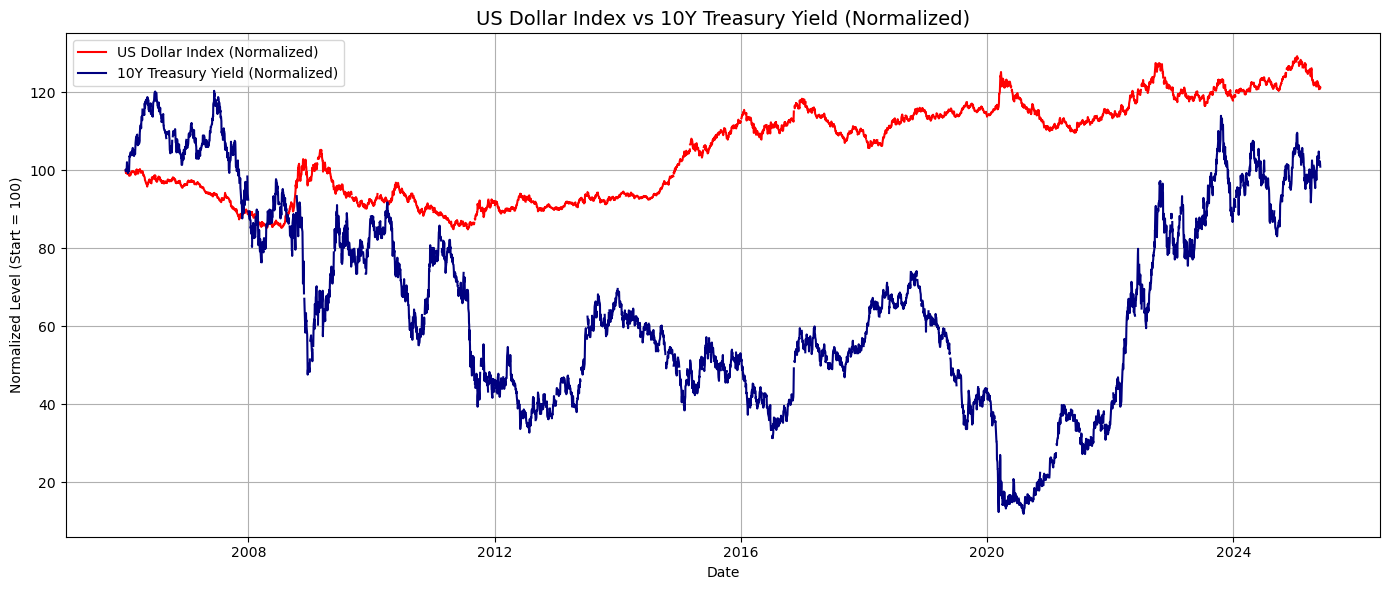

In [33]:
# same starting point normalization
dxy_norm = (merged_df["Dollar_Index"] / merged_df["Dollar_Index"].iloc[0]) * 100
yield_norm = (merged_df["Yield_10Y"] / merged_df["Yield_10Y"].iloc[0]) * 100

plt.figure(figsize=(14, 6))
plt.plot(merged_df["Date"], dxy_norm, label="US Dollar Index (Normalized)", color="red")
plt.plot(merged_df["Date"], yield_norm, label="10Y Treasury Yield (Normalized)", color="navy")

plt.title("US Dollar Index vs 10Y Treasury Yield (Normalized)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Normalized Level (Start = 100)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

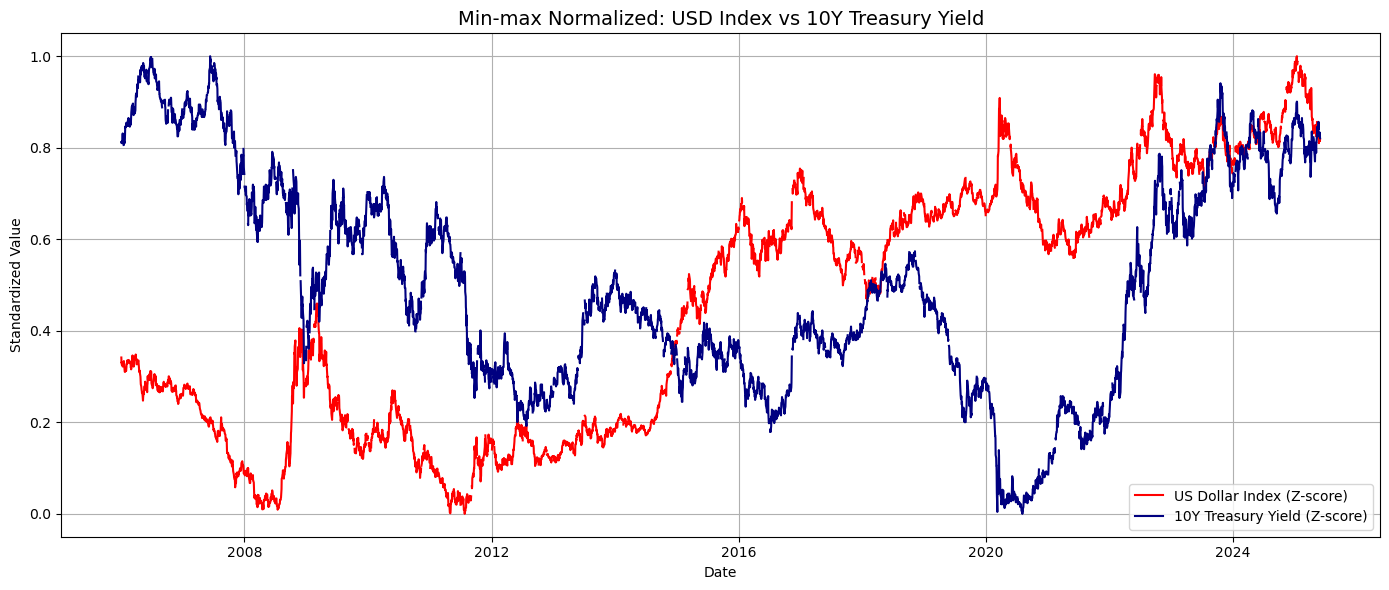

In [30]:
# min-max normalization
dxy_minmax = (merged_df["Dollar_Index"] - merged_df["Dollar_Index"].min()) / (merged_df["Dollar_Index"].max() - merged_df["Dollar_Index"].min())
yield_minmax = (merged_df["Yield_10Y"] - merged_df["Yield_10Y"].min()) / (merged_df["Yield_10Y"].max() - merged_df["Yield_10Y"].min())

plt.figure(figsize=(14, 6))
plt.plot(merged_df["Date"], dxy_minmax, label="US Dollar Index (Z-score)", color="red")
plt.plot(merged_df["Date"], yield_minmax, label="10Y Treasury Yield (Z-score)", color="navy")

plt.title("Min-max Normalized: USD Index vs 10Y Treasury Yield", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Standardized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

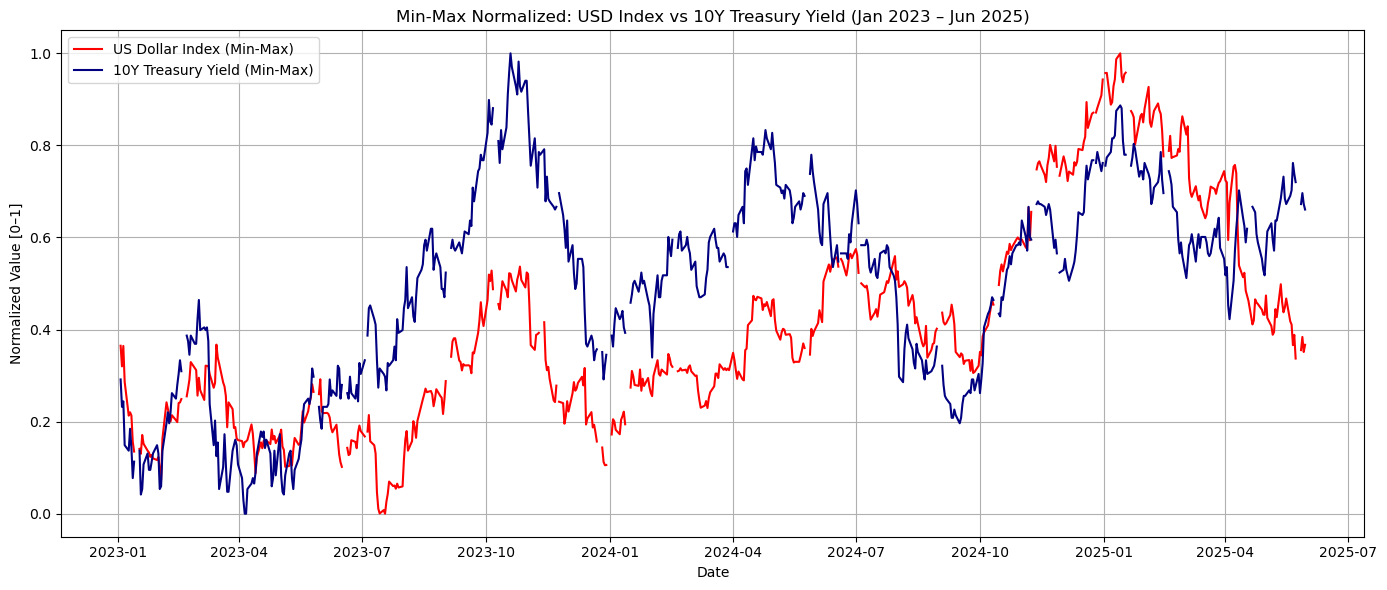

In [32]:
# 2023-2025 focused min-max normalized
focused_df = merged_df[(merged_df["Date"] >= "2023-01-01") & (merged_df["Date"] <= "2025-06-30")].copy()

dxy_minmax_focused = (focused_df["Dollar_Index"] - focused_df["Dollar_Index"].min()) / (focused_df["Dollar_Index"].max() - focused_df["Dollar_Index"].min())
yield_minmax_focused = (focused_df["Yield_10Y"] - focused_df["Yield_10Y"].min()) / (focused_df["Yield_10Y"].max() - focused_df["Yield_10Y"].min())

plt.figure(figsize=(14, 6))
plt.plot(focused_df["Date"], dxy_minmax_focused, label="US Dollar Index (Min-Max)", color="red")
plt.plot(focused_df["Date"], yield_minmax_focused, label="10Y Treasury Yield (Min-Max)", color="navy")
plt.title("Min-Max Normalized: USD Index vs 10Y Treasury Yield (Jan 2023 – Jun 2025)")
plt.xlabel("Date")
plt.ylabel("Normalized Value [0–1]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# rolling correlation
merged_df["Rolling_Correlation"] = merged_df["Yield_10Y"].rolling(window=30).corr(merged_df["Dollar_Index"])

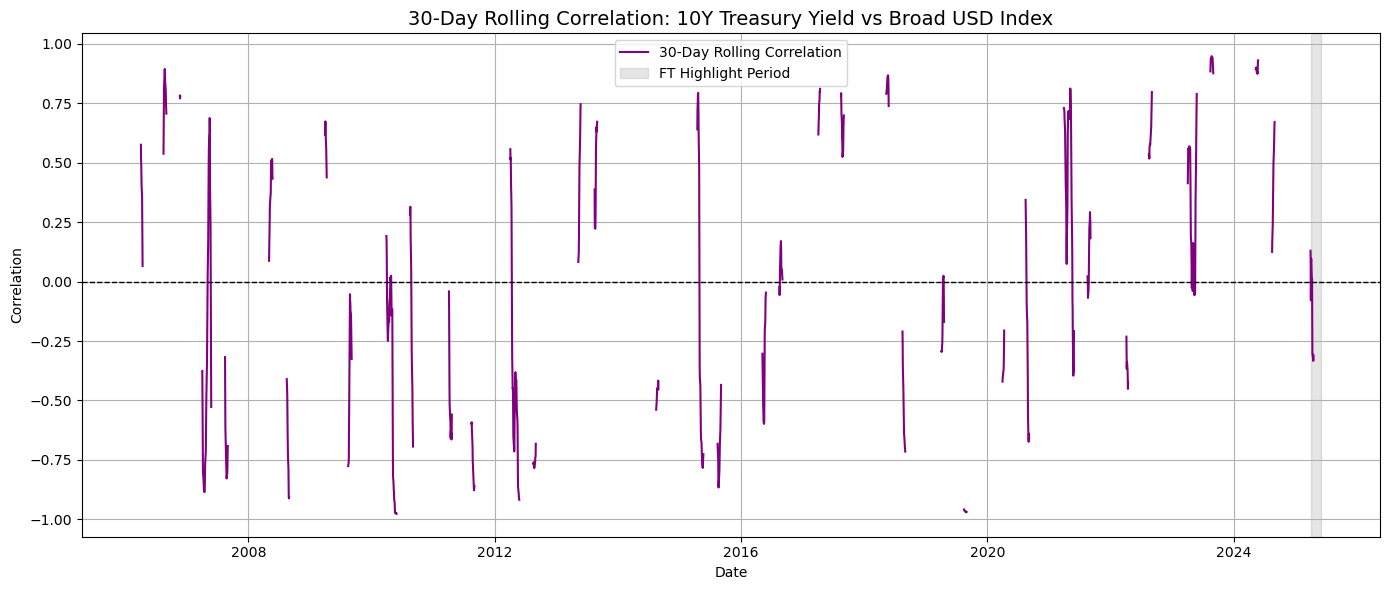

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(merged_df["Date"], merged_df["Rolling_Correlation"], label="30-Day Rolling Correlation", color='purple')

# period from the FT article
plt.axvspan(pd.to_datetime("2025-04-01"), pd.to_datetime("2025-06-01"), color='gray', alpha=0.2, label="FT Highlight Period")

plt.title("30-Day Rolling Correlation: 10Y Treasury Yield vs Broad USD Index", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()